# DECISIONTREEREGRESSOR

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('MSFT.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [3]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
del data['Date']
del data['Adj Close']

In [5]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [6]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
df=data.dropna()
df.head()

,Open,High,Low,Close,Volume
0,0.088542,0.101563,0.088542,0.097222,1031788800
1,0.097222,0.102431,0.097222,0.100694,308160000
2,0.100694,0.103299,0.100694,0.102431,133171200
3,0.102431,0.103299,0.098958,0.099826,67766400
4,0.099826,0.100694,0.097222,0.098090,47894400


In [8]:
x=df.drop(labels='Close',axis=1)
y=df.loc[:,'Close']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print("NUMBER OF TRAIN DATASET:",len(x_train))
print("NUMBER OF TEST DATASET :",len(x_test))
print("TOTAL NUMBER OF DATASET:",len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET: 7266
NUMBER OF TEST DATASET : 1817
TOTAL NUMBER OF DATASET: 9083


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  7266
NUMBER OF TEST DATASET      :  1817
TOTAL NUMBER OF DATASET    :  9083


In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [13]:
predicted=DTR.predict(x_test)

In [14]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predicted)
print("THE R2 SCORE OF DECISIONTREEREGRESSOR IS :",R2)

THE R2 SCORE OF DECISIONTREEREGRESSOR IS : 0.9998550877507864


In [15]:
from sklearn.metrics import rand_score
RAND = rand_score(y_test,predicted)
print("THE ACCURACY SCORE OF DECISIONTREEREGRESSOR IS :",RAND*100)

THE ACCURACY SCORE OF DECISIONTREEREGRESSOR IS : 99.93520568104951


In [16]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test,predicted)
print("THE EXPLAINED VARIENCE SCORE OF  DECISIONTREEREGRESSOR IS :",EVS)

THE EXPLAINED VARIENCE SCORE OF  DECISIONTREEREGRESSOR IS : 0.9998553537698671


In [17]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predicted)
print("THE MEAN SQUARED ERROR SCORE OF DECISIONTREEREGRESSOR IS :",MSE)

THE MEAN SQUARED ERROR SCORE OF DECISIONTREEREGRESSOR IS : 0.5657773024465536


In [18]:
from sklearn.metrics import median_absolute_error
MAE = median_absolute_error(y_test,predicted)
print("THE MEAN ABSOLUTE ERROR SCORE OF DECISIONTREEREGRESSOR IS :",MAE)

THE MEAN ABSOLUTE ERROR SCORE OF DECISIONTREEREGRESSOR IS : 0.10250100000000018


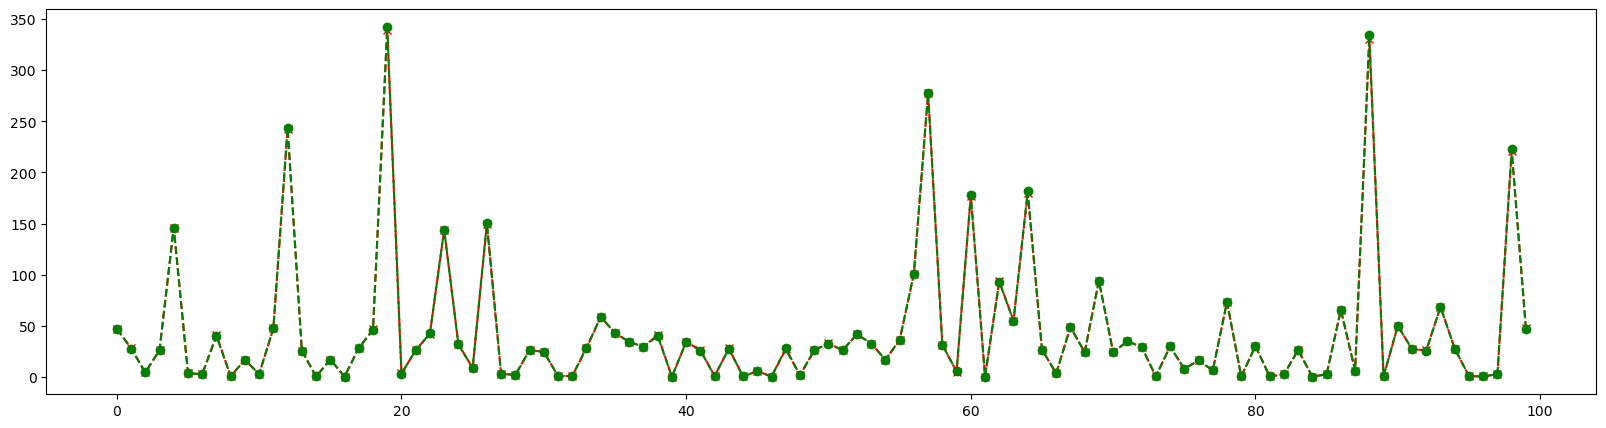

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [20]:
import joblib
joblib.dump(DTR,'Microsoft.pkl')

['Microsoft.pkl']